Mindset

-Evaluation will be kept lenient, so make sure you attempt this case study.

-Read the question carefully and try to understand what exactly is being asked.

-Brainstorm a little. If you’re getting an error, remember that Google is your best friend.

-You can watch the lecture recordings or go through your lecture notes once again if you feel like you’re getting confused over some specific topics.

-Discuss your problems with your peers. Make use of the Slack channel and WhatsApp group.

-Only if you think that there’s a major issue, you can reach out to your Instructor via Slack or Email.

-There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.


#About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset

Link: Dataset_link

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show
Type: Identifier - A Movie or TV Show
Title: Title of the Movie / Tv Show
Director: Director of the Movie
Cast: Actors involved in the movie/show
Country: Country where the movie/show was produced
Date_added: Date it was added on Netflix
Release_year: Actual Release year of the movie/show
Rating: TV Rating of the movie/show
Duration: Total Duration - in minutes or number of seasons
Listed_in: Genre
Description: The summary description

Hints

The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries
Evaluation Criteria (100 Points):

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Submission Process:

Type your insights and recommendations in the rich-text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Alternatively, you can directly submit your PDF on the portal.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\Netflix Case study\Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [141]:
# df.to_csv(r"C:\Users\Vaibhav\Desktop\Netflix Case study\Netflix.csv",index=False)
#saved file to local drive to extract if needed in later stage

DEFINING PROBLEM STATEMENT:

-Problem statement consists of analysing existing data and analysing region-wise what are the various parameters which makes a show succesful.

These parameters may be type, duration, listed_in, dierctor, cast.

we also need to analyse the trend which is being followed / change over time.

In [142]:
print(df.shape)

(8807, 12)


Above shape of data shows that we have about 9000 entries which may provide a sufficiently large enough data set to begin our analysis acress categories, region and type.

In [143]:
print(df.isna().sum()/df.shape[0]*100)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


From above result we can infer that the data set contains some missing values.

For Example:

around 30% of entries doesn't have directors data.

around 10% of entries doesn't have cast or countries data

Lets analyse each columns individually to get more insights on Same data

In [144]:
for i in range(df.shape[1]):
    print(df[df.columns[i]].value_counts())

show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, St

Observations: by count we can only make any observations in categorical columns such as type, rating etc and not anu numerical data like duration

show_id: we can see that there are no duplicate value in show_id, hence it can be used as an index but for now we will leave it as it is

type: as we can see that there are far more movies count (6131) as compared to TV shows (2676).

title: Skipping this as just like show_id, titles are also unique

Directors: as we can see, most shows made by a single directior is 19, we will plot distribution along this columns in future to analyse further.

Cast/country/listed_in: Need to unpack the data as combination is also taken as unique. hence skipping it for now.

Date added, duration: being continuous data in nature will not be considered for count analysis.

release_Year: we can observe that there is a spike in number of titles in 2018 which is 1147 which is hish that both 2017 (1032 titles) and 2019 (1030) titles. we will deep down into this in future

rating: needs cleaning as rating includes data such as '74 min', '84 min'. Also TV-MA and TV-14 has highest titles which is 3207 and 2160 respectively.

duration: to analyse this first we need to seperate both movies and TV show as unit of measurements are different in both type (seasons in case of TV show and mins in case of movies).

description: Surprisingly we see that description are repeating which may suggest that same titles are being repeated multiple times. Need to dive deep and analyse repeating titles.

In [145]:
#checking titles having same description (description repeating more than once)
sample = df[df.description.isin(df.description.value_counts()[df.description.value_counts()>1].index)]
sample.sort_values(by="description").head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
7022,s7023,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"January 1, 2018",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
2969,s2970,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,"February 1, 2020",1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
3492,s3493,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,"September 25, 2019",2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...


We can see that same titles are repeated due to various reasons:

1. same title released in multiple languages: Example "bhoomika"
2. spelling of titles varies for some movies titles: "Ollie & Moon" and "The Ollie & Moon Show" which are essentially the same.
3. rating changed over time, for example: "Chashme Baddoor" in May 2017 it was TV-PG, again added in July 2020 as TV-14.

In [146]:
df[df.country.notna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


### Cleaning Data

In [147]:
ser_con = pd.Series(df.country.str.split(","))
df_con = pd.DataFrame([df.show_id, ser_con]).T
df_con = df_con.explode("country")
df_con.show_id.value_counts()
df_con.head(10)


,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,NaN
3,s4,NaN
4,s5,India
5,s6,NaN
6,s7,NaN
7,s8,United States
7,s8,Ghana
7,s8,Burkina Faso


Creating sub dataset having all show Id and country along with it

In [148]:
ser_dir = pd.Series(df.director.str.split(","))
df_dir = pd.DataFrame([df.show_id, ser_dir]).T
df_dir = df_dir.explode("director")
df_dir.head(10)

,show_id,director
0,s1,Kirsten Johnson
1,s2,NaN
2,s3,Julien Leclercq
3,s4,NaN
4,s5,NaN
5,s6,Mike Flanagan
6,s7,Robert Cullen
6,s7,José Luis Ucha
7,s8,Haile Gerima
8,s9,Andy Devonshire


creating sub data set having show ID with directors

In [149]:
ser_cast = pd.Series(df.cast.str.split(","))
df_cast = pd.DataFrame([df.show_id, ser_cast]).T
df_cast = df_cast.explode("cast")
df_cast.head(10)

,show_id,cast
0,s1,NaN
1,s2,Ama Qamata
1,s2,Khosi Ngema
1,s2,Gail Mabalane
1,s2,Thabang Molaba
1,s2,Dillon Windvogel
1,s2,Natasha Thahane
1,s2,Arno Greeff
1,s2,Xolile Tshabalala
1,s2,Getmore Sithole


creating sub data set having show ID with cast

In [150]:
ser_lin = pd.Series(df.listed_in.str.split(","))
df_lin = pd.DataFrame([df.show_id, ser_lin]).T
df_lin = df_lin.explode("listed_in")
df_lin.head(10)

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
1,s2,TV Dramas
1,s2,TV Mysteries
2,s3,Crime TV Shows
2,s3,International TV Shows
2,s3,TV Action & Adventure
3,s4,Docuseries
3,s4,Reality TV
4,s5,International TV Shows


creating sub data set having show ID with genre

In [151]:
J1 = df_dir.merge(df_cast,on = 'show_id',how = 'outer')
J1.head(20)
J2 = J1.merge(df_con,on = 'show_id', how = 'outer')
J2.head(30)
J3 = J2.merge(df_lin,on = 'show_id',how = 'outer')
J3.head(50)
df = df.merge(J3,on = 'show_id',how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director_x    151422 non-null  object
 4   cast_x        199916 non-null  object
 5   country_x     190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in_x   202065 non-null  object
 11  description   202065 non-null  object
 12  director_y    151422 non-null  object
 13  cast_y        199916 non-null  object
 14  country_y     190168 non-null  object
 15  listed_in_y   202065 non-null  object
dtypes: int64(1), object(15)
memory usage: 24.7+ MB


We have merged all dataset and created a unique cobination for all cast, country, Genre, directors.

In [152]:
df.isna().sum()

show_id             0
type                0
title               0
director_x      50643
cast_x           2149
country_x       11897
date_added        158
release_year        0
rating             67
duration            3
listed_in_x         0
description         0
director_y      50643
cast_y           2149
country_y       11897
listed_in_y         0
dtype: int64

although the sgow IDs are repeating we can see that dirctiors is the column which have most of the data as null

In [153]:
df.drop(labels = ["director_x",'cast_x','country_x','listed_in_x'],axis=1,inplace= True)

Removing original columns for nested data

In [154]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director_y,cast_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s10,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,United States,Comedies
2,s10,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,United States,Dramas
3,s10,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Chris O'Dowd,United States,Comedies
4,s10,Movie,The Starling,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Chris O'Dowd,United States,Dramas


In [155]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description',
 'director_y',
 'cast_y',
 'country_y',
 'listed_in_y']

In [156]:
df.columns = ['show_id',
 'type',
 'title',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'description',
 'director',
 'cast',
 'country',
 'listed_in']

Renaming new columns which are exploded

In [157]:
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')
#September 24, 2021
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,United States,Comedies
2,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Melissa McCarthy,United States,Dramas
3,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Chris O'Dowd,United States,Comedies
4,s10,Movie,The Starling,2021-09-24,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Theodore Melfi,Chris O'Dowd,United States,Dramas


Converting date added column to date time format

In [158]:
df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
description         0
director        50643
cast             2149
country         11897
listed_in           0
dtype: int64

We can see that there are a few columns which have null values, lets start cleaning with lowest null count that is duration

In [159]:
df[df.duration.isna()].index

Index([114507, 120566, 120775], dtype='int64')

In [160]:
df[df.duration.isna()].index.tolist()

[114507, 120566, 120775]

In [161]:
df['duration'][df[df.duration.isna()].index.tolist()] = df.rating[df[df.duration.isna()].index.tolist()]

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_16608\3090609121.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['duration'][df[df.duration.isna()].index.tolist()] = df.rating[df[df.duration.isna()].index.tolist()]
C:\Users\Vaibhav\AppD

Assigning rating to duration as we can see that rating column has duration values for these 3 items

In [162]:
df.rating.unique().tolist()

['PG-13',
 'TV-MA',
 'TV-14',
 'TV-Y',
 'TV-Y7',
 'R',
 'PG',
 'TV-PG',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 nan,
 'TV-Y7-FV',
 'UR']

Checking next column which is rating

In [163]:
valid_rating = ['PG-13',
 'TV-MA',
 'TV-14',
 'TV-Y',
 'TV-Y7',
 'R',
 'PG',
 'TV-PG',
 'TV-G',
 'G',
 'NC-17',
 'NR',
 'TV-Y7-FV',
 'UR']

we have created a list of valid ratings.

In [164]:
mask = df['rating'].isin(valid_rating).apply(lambda x: not x)
# mask.apply(lambda x: not x)
df.loc[mask, "rating"] = "NR"

assigining rating 'NR' for all non-valid rating entries

In [165]:
df[df['date_added'].isna()].release_year.value_counts()

release_year
2015    40
2008    36
2013    27
2003    24
2012    24
2016     5
2018     1
2010     1
Name: count, dtype: int64

In [166]:
# df.loc[df['date_added'].isna(), "date_added"] = pd.to_datetime(df[df['date_added'].isna()]['release_year'])

In [167]:
df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating              0
duration            0
description         0
director        50643
cast             2149
country         11897
listed_in           0
dtype: int64

In [168]:
df[((df.cast.isna()) & (df.director.isna()))][['show_id','title']]

,show_id,title
205,s1006,Keymon and Nani in Space Adventure
206,s1006,Keymon and Nani in Space Adventure
263,s1012,Free to Play
1176,s1039,Dancing Angels
1177,s1039,Dancing Angels
...,...,...
199754,s901,"Money, Explained"
200191,s926,Angelina Ballerina
200192,s926,Angelina Ballerina
200500,s937,Miniforce: Super Dino Power


In [169]:
df.groupby('director')[['title','director','cast']]
s = pd.to_datetime(df.date_added, dayfirst=True)
df['date_added'] = s
df['duration'] = df.duration.str.split(" ").apply(lambda X:X[0]).astype('int')

Converting duration to numeric

In [170]:
df.isnull().sum()
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   date_added    201907 non-null  datetime64[ns]
 4   release_year  202065 non-null  int64         
 5   rating        202065 non-null  object        
 6   duration      202065 non-null  int32         
 7   description   202065 non-null  object        
 8   director      151422 non-null  object        
 9   cast          199916 non-null  object        
 10  country       190168 non-null  object        
 11  listed_in     202065 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 17.7+ MB


By looking at unique values we can conclude the following regarding the dataset attributes:
1. type: only 2 types are present
2. release_year: we have data for past 74 years given that no value in between is missing
3. ratings: there are 14 various types of rating
4. country: shows are released in 197 countries.

#### we will initialize now our univariate analysis

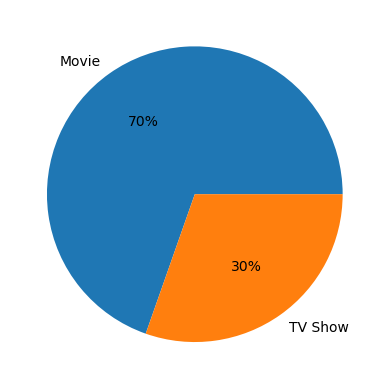

In [171]:
s = df.groupby('type')['show_id'].nunique()
plt.pie(s,labels=s.index, autopct='%.0f%%' )
plt.show()

Observation: 70% titles belongs to movies while 30% titles are TV shows

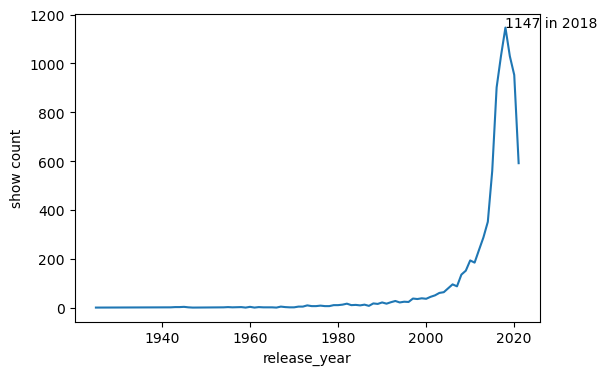

In [172]:
s = df.groupby("release_year")['show_id'].nunique()
# print(s.head)
plt.figure(figsize=(6,4))
sns.lineplot(s)
plt.ylabel('show count')
plt.annotate(f"{s.max()} in {s.index[s.argmax()]}",xy=(s.index[s.argmax()],s.max()))
plt.show()

we can also see that the most of the added titles are recently added. Majorly of 2018.

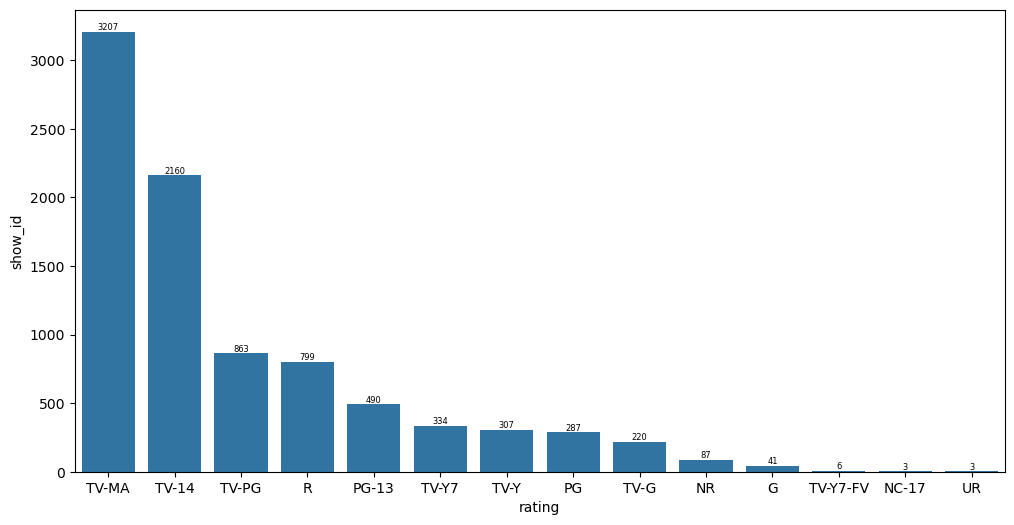

In [173]:
s = df.groupby('rating')['show_id'].nunique().sort_values(ascending=False).reset_index()
# s.head()
plt.figure(figsize=(12,6))

sns.barplot(data=s, x='rating',y = 'show_id')
ax = plt.gca()
ax.bar_label(ax.containers[0], fontsize=6)
plt.show()

cosidering rating-wise, we can see that "TV-MA' have highest number of titles which is 3207

In [174]:
# !pip install squarify
import squarify

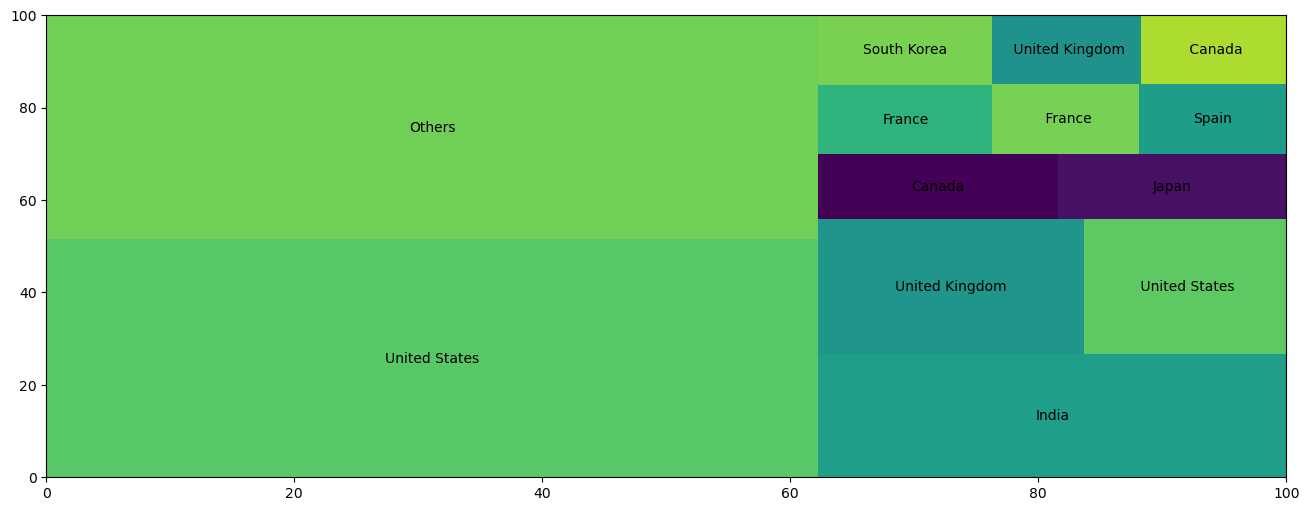

In [175]:
s = df.groupby('country')['show_id'].nunique().sort_values(ascending=False).reset_index()
# my_column_90th_percentile = s['show_id'].quantile(0.9)
# my_column_90th_percentile
s.loc[12:,'country'] = 'Others'
s.head(15)
s = s.groupby('country')['show_id'].agg("sum").sort_values(ascending=False)
plt.figure(figsize=(16,6))
squarify.plot(s,label = s.index)
plt.show()
# print(s.head())

we can see that most of the titles are being released in US followed by India.

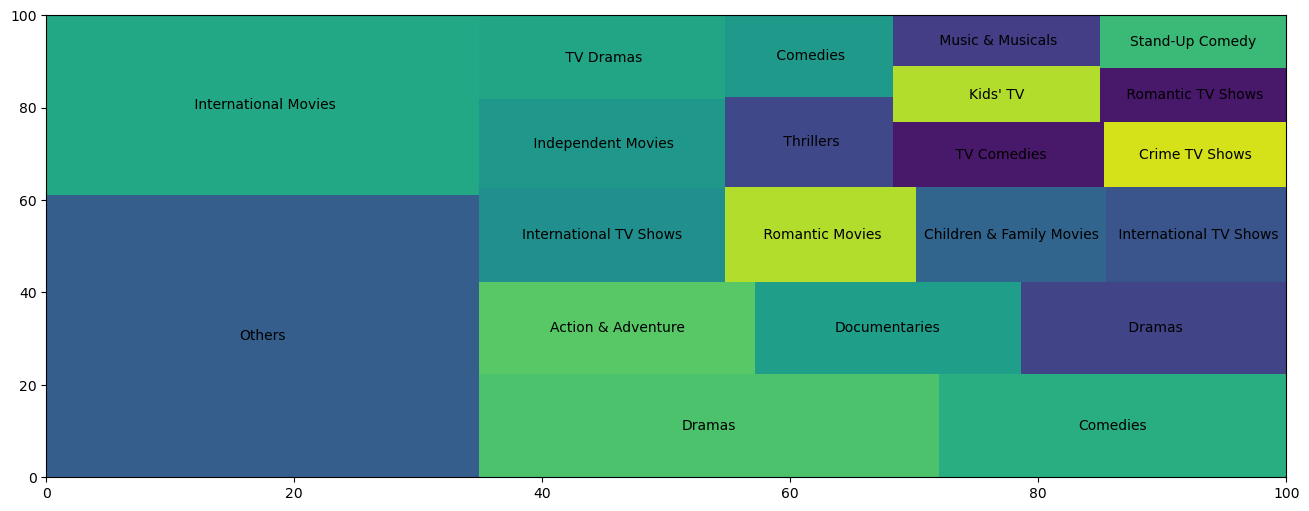

In [176]:
s = df.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,6))
# print(s)
s.loc[20:,'listed_in'] = 'Others'
# print(s)
s = s.groupby('listed_in')['show_id'].agg("sum").sort_values(ascending=False)
# print(s)
# sns.lineplot(x='listed_in',y='show_id',hue='type',data=s)
squarify.plot(s,label = s.index)
plt.show()

we can see that most of the titles are being released under international Movies.

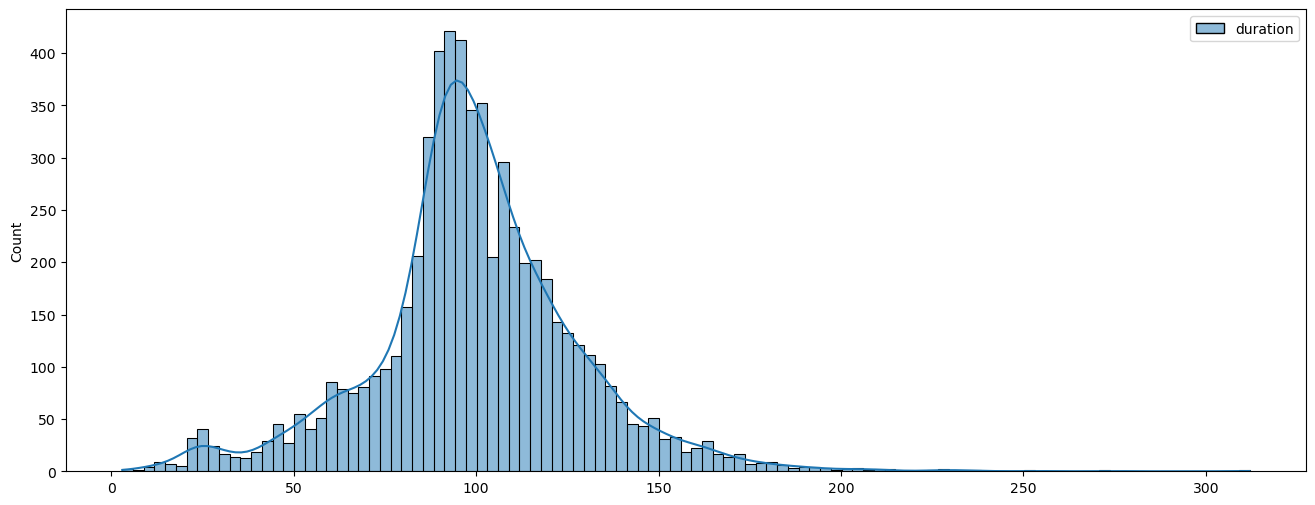

In [177]:
s = df[df.type=="Movie"][['title','duration']].drop_duplicates()
# s.info()
plt.figure(figsize=(16,6))
sns.histplot(s,kde=True)
plt.show()
# df.info()

we can see that there is a bell curve forming while plotting duration histogram for movies.
we can see that peak frequency of the movie duration lies around 90-110 minutes 

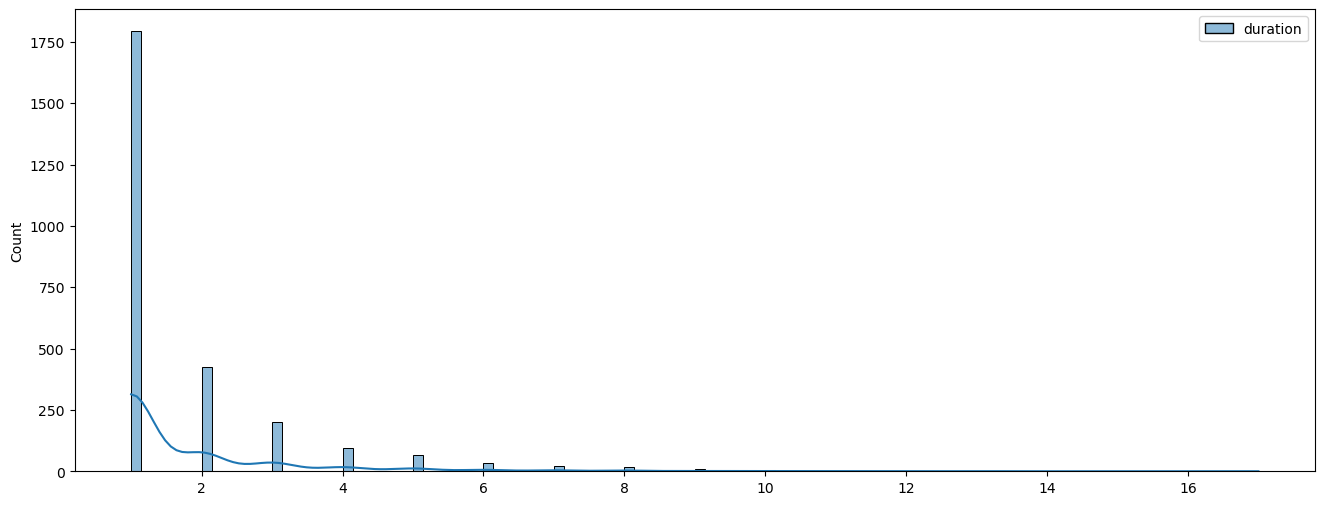

In [178]:
# df.type.value_counts()
s = df[df.type=="TV Show"][['title','duration']].drop_duplicates()
# s.info()
plt.figure(figsize=(16,6))
sns.histplot(s,kde=True)
plt.show()

we can see that most of the tv show have 1 season and have decreasing frequency as the number of season increases

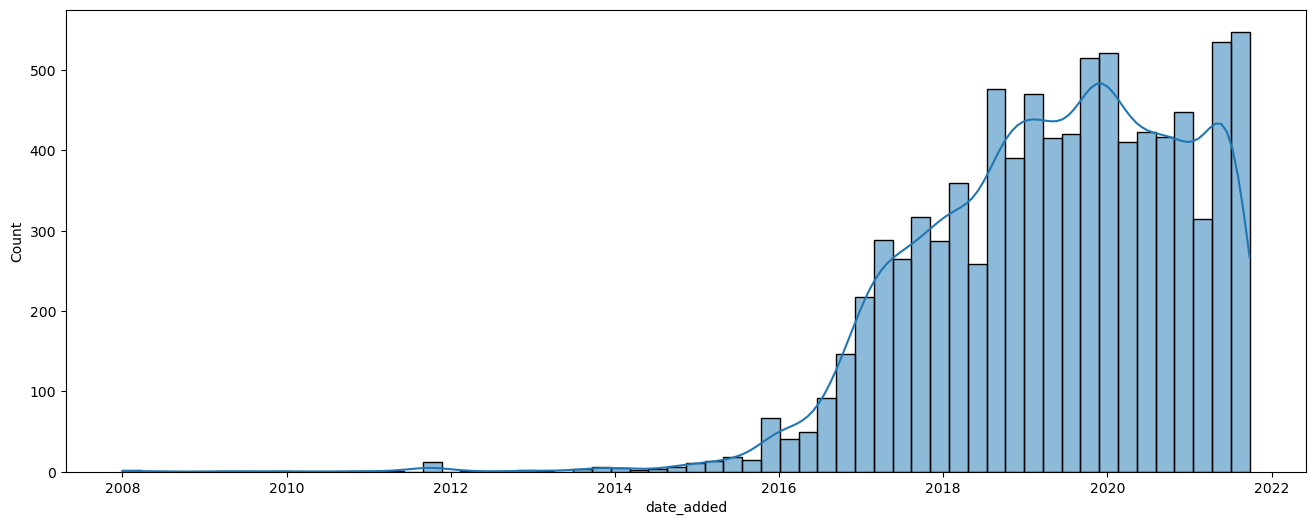

In [179]:
s = df[['title','date_added']].drop_duplicates()
# s.info()
plt.figure(figsize=(16,6))
sns.histplot(s.date_added,kde=True)
plt.show()

we can observe that there was a sudden growth in number of titles added between 2016 to 2018. then the added titles plateaues and then decreases.

### bi-variate analysis

1. ##### type-release_year

<Axes: xlabel='release_year', ylabel='show_id'>

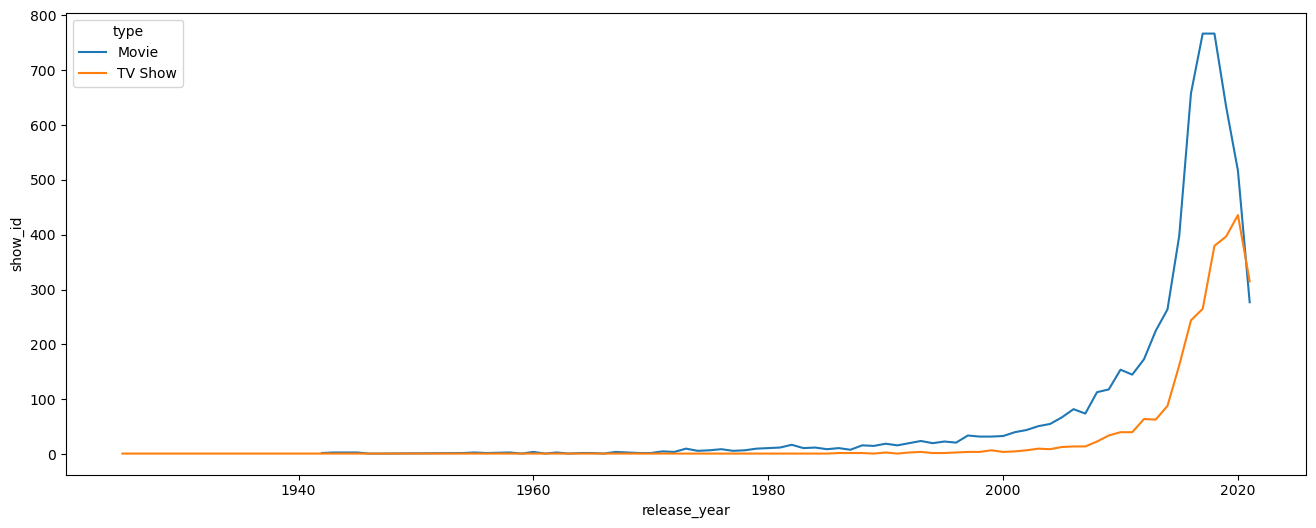

In [180]:
s = df.groupby(['release_year','type'])['show_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,6))
sns.lineplot(x='release_year',y='show_id',hue='type',data=s)
# correlation = s[s['type'] == 'Movies']['show_id'].corr(s[s['type'] == 'TV Show']['show_id'])
# s.value_counts()
# print(correlation)
# plt.show()

we can observe that both the movieas and TV show moves parallely to eachother and the ratio or release year in movies and TV show remains alsmost same.

2. ##### Type-rating

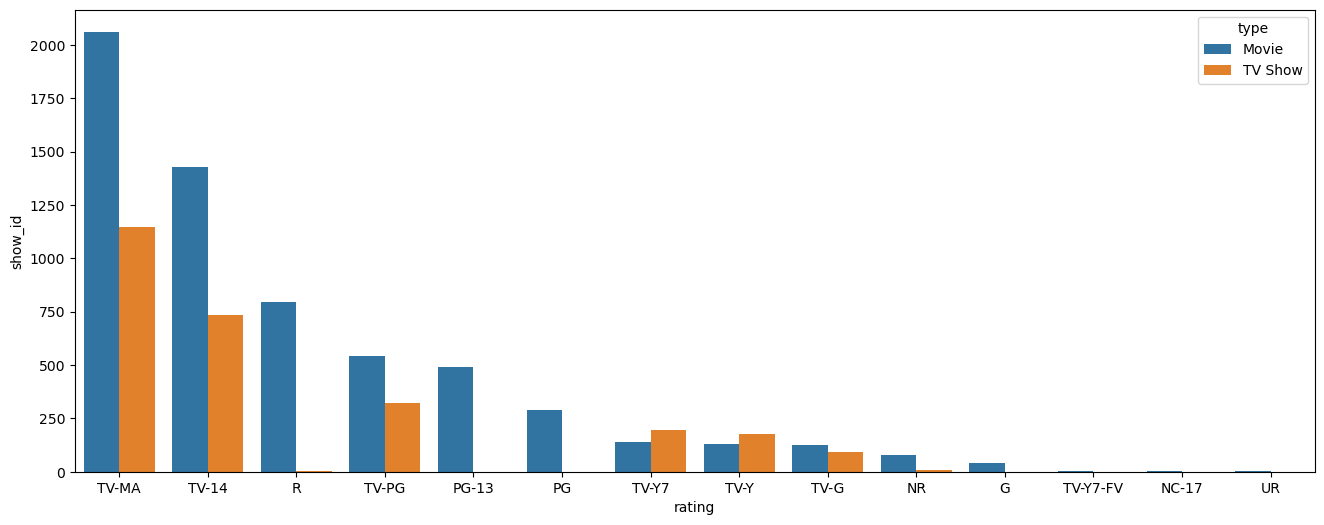

In [181]:
s = df.groupby(['rating','type'])['show_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='rating',y='show_id',hue='type',data=s)
plt.show()

for rating "TV-MA', "TV-14", and "TV-PG" we can see that the 70/30 ratio if more or less followed, however for "R","PG-13" & "PG" rating there are almost zero TV show. however 'TV-Y7', 'TV-Y' and 'TV-G' have more TV-show than movies


3. ##### Type-listed_in

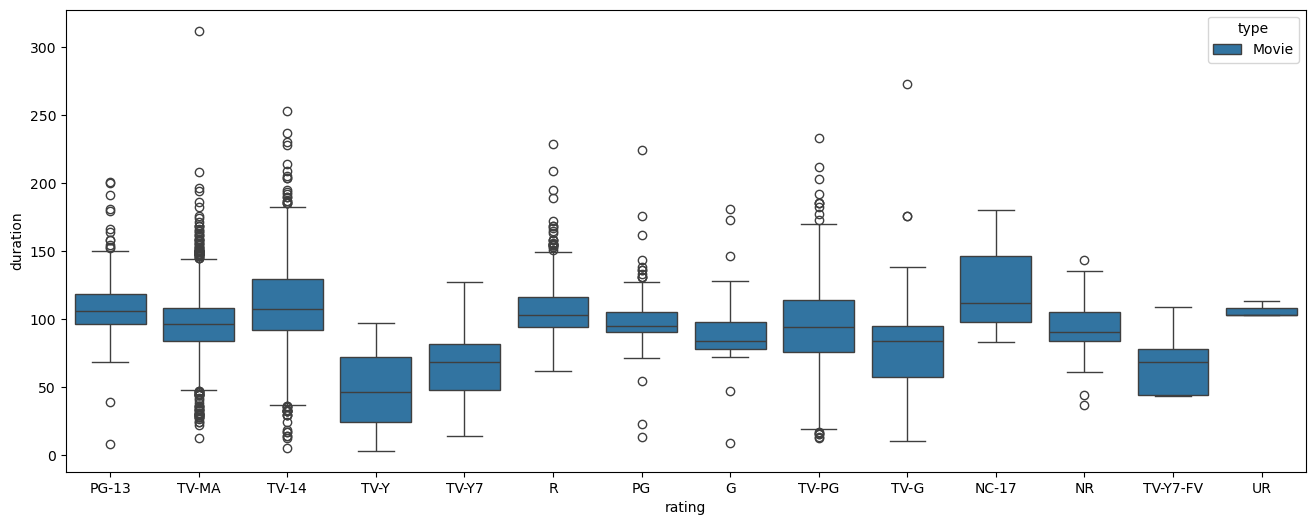

In [182]:
s = df[['title','rating','duration','type']].drop_duplicates()
plt.figure(figsize=(16,6))
sns.boxplot(x='rating', y='duration', data=s[s.type=='Movie'],hue="type")
plt.show()

We can see that NC-17 rating have the longest duration movies on an average. but it is difficult to make any conclusion as data have multiple outliers.

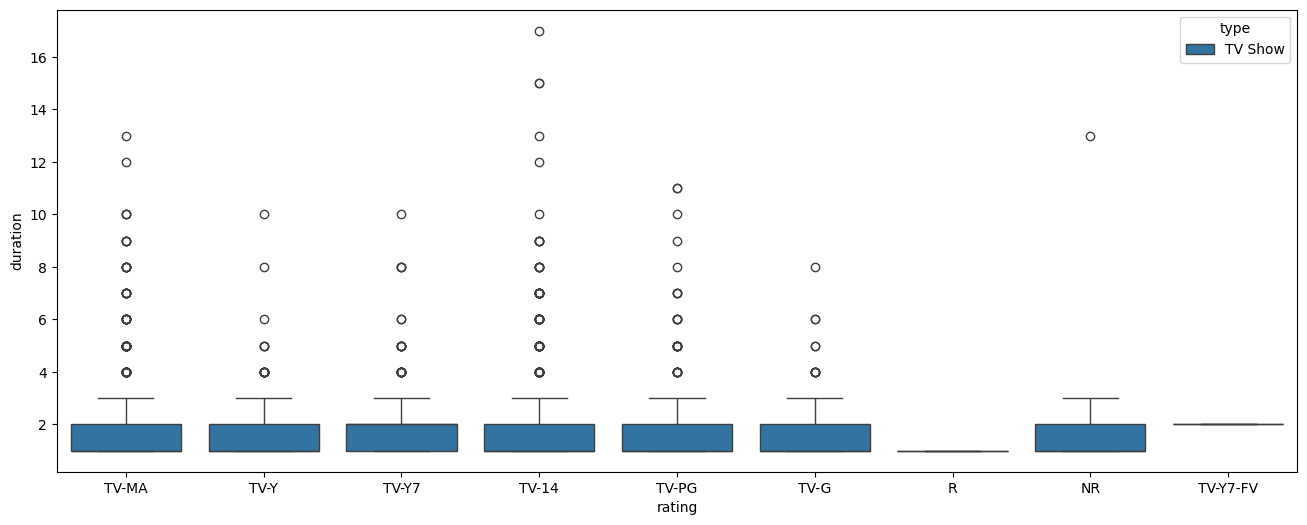

In [183]:
s = df[['title','rating','duration','type']].drop_duplicates()
plt.figure(figsize=(16,6))
sns.boxplot(x='rating', y='duration', data=s[s.type=='TV Show'],hue="type")
plt.show()

similar to Movies, it is difficult to make any conclusion as data have multiple outliers.

## Conclusion

1. 70% of titles are movies
2. Most viewed country is US followed by India
3. Release year of the titles are mostly belonging to 2016 to 2021 hence recently added titles have more preference
4. Rating: 'TV-MA' is the highest hence TV-MA is the most popular rating for any title to be released in.
5. Duration of most movies lies between 90-110 minutes 
6. Tv-show have 1 season as most frequency
7. country: US & India takes major chunk of the portion.
